## Reading Files into Python

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reding data
df = pd.read_csv('data/nyc_taxi_trip_duration.csv')

In [3]:
df.shape

(729322, 11)

In [4]:
# check data
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [5]:
# last 5 instances
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [6]:
# get the columns
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [7]:
# chek the data types
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [8]:
# Update to datetime
df.pickup_datetime = pd.to_datetime(df.pickup_datetime,format="%Y-%m-%d %H:%M:%S")
df.dropoff_datetime = pd.to_datetime(df.dropoff_datetime,format="%Y-%m-%d %H:%M:%S")

# confirm
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

### Check for null values and duplicates

In [9]:
# Check if any null
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

#### No  Null in the data

In [10]:
# Check if any duplicates
df.duplicated().sum()

0

#### No Duplicates in the data

### Check unique values per column

In [11]:
# Check unique values per column
df.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

In [12]:
# Get different date components

# use only one of the dates to get the components - as  not expecting too much of difference between a taxi trip
# Use pickup_datetime

df['day_of_month'] = df['pickup_datetime'].dt.day
df['day_name'] = df['pickup_datetime'].dt.day_name()
df['hour'] = df['pickup_datetime'].dt.hour

In [13]:
# Bin the travel hour into four hours slot
# hm_bins = [0,4,7,12,15,19,24]
hr_bins = [0,4,8,12,16,20,24]
hr_labels = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']

df['hour_slot'] = pd.cut(df['hour'], bins=hr_bins, labels=hr_labels, include_lowest=True)

In [14]:
# convert day of month and hour to categorial data
#df['day_of_month'] = df['day_of_month'].astype('category')
#df['hour'] = df['hour'].astype('category')

In [15]:
# checking new extracted columns using
df[['pickup_datetime','day_of_month','day_name','hour','hour_slot']].head()

,pickup_datetime,day_of_month,day_name,hour,hour_slot
0,2016-02-29 16:40:21,29,Monday,16,Noon
1,2016-03-11 23:35:37,11,Friday,23,Night
2,2016-02-21 17:59:33,21,Sunday,17,Eve
3,2016-01-05 09:44:31,5,Tuesday,9,Morning
4,2016-02-17 06:42:23,17,Wednesday,6,Early Morning


In [16]:
# Get the distance travelled from the latitude and longitude columns
# import sklearn
from sklearn.neighbors import DistanceMetric

In [17]:
# latitude and longitudes needs to be converted to radians
# add columns with radians for latitude and longitude

df['pickup_lat_radians'] = np.radians(df['pickup_latitude'])
df['pickup_long_radians'] = np.radians(df['pickup_longitude'])

df['dropoff_lat_radians'] = np.radians(df['dropoff_latitude'])
df['dropoff_long_radians'] = np.radians(df['dropoff_longitude'])

In [18]:
# Calculate the distance in KM's
# 6371 is the radius of earth in km's

#dist = sklearn.neighbors.DistanceMetric.get_metric('haversine')
dist = DistanceMetric.get_metric('haversine')

# explore to remove the loop - to do 
dist_km = []
for i, row in df.iterrows():
    z = dist.pairwise([(row['pickup_lat_radians'],row.pickup_long_radians)], [(row['dropoff_lat_radians'],row.dropoff_long_radians)]) * 6371
    dist_km.append(z[0][0])

df['distance'] = dist_km

In [19]:
# remove the lat,long and related 'radians' columns and the dates column
drop_cols = ['pickup_longitude', 'pickup_latitude','dropoff_longitude','dropoff_latitude',
            'pickup_lat_radians','pickup_long_radians','dropoff_lat_radians','dropoff_long_radians',
            'dropoff_datetime','pickup_datetime']

df.drop(columns=drop_cols,inplace=True)

df.head()

,id,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,day_of_month,day_name,hour,hour_slot,distance
0,id1080784,2,1,N,400,29,Monday,16,Noon,1.199073
1,id0889885,1,2,N,1100,11,Friday,23,Night,4.129111
2,id0857912,2,2,N,1635,21,Sunday,17,Eve,7.250753
3,id3744273,2,6,N,1141,5,Tuesday,9,Morning,2.361097
4,id0232939,1,1,N,848,17,Wednesday,6,Early Morning,4.328534


In [20]:
df.dtypes

id                      object
vendor_id                int64
passenger_count          int64
store_and_fwd_flag      object
trip_duration            int64
day_of_month             int64
day_name                object
hour                     int64
hour_slot             category
distance               float64
dtype: object

### Remove the outliers

In [21]:
# Function  to remove outliers
# updates and value less than q1-1.5iqr to to q1-1.5iqr and 
# values more than  q3+1.5iqr to q3+1.5*iqr
# Distance  and distance  per hour - treat the outliers - as per eda done previously
# Craete a function to remove the  outliers
def replace_ol(x,method):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3-q1
    lower_val = q1 - (1.5 * iqr)
    upper_val = q1 + (1.5 * iqr)

    if method == 'iqr' :
        return (x.clip(lower = lower_val,upper = upper_val))
    else : # by median, not mean
        med = x.median()
        #y = np.where(x > upper, med, x)
        #y = np.where(x < lower, med, y)
        #return y
        return(x.clip(lower = med,upper = med))

In [22]:
df['distance'] = replace_ol(df['distance'],'iqr')

In [23]:
df.head()

,id,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,day_of_month,day_name,hour,hour_slot,distance
0,id1080784,2,1,N,400,29,Monday,16,Noon,1.199073
1,id0889885,1,2,N,1100,11,Friday,23,Night,4.129111
2,id0857912,2,2,N,1635,21,Sunday,17,Eve,5.198374
3,id3744273,2,6,N,1141,5,Tuesday,9,Morning,2.361097
4,id0232939,1,1,N,848,17,Wednesday,6,Early Morning,4.328534


#### Get one hot encoding

In [24]:
df.dtypes

id                      object
vendor_id                int64
passenger_count          int64
store_and_fwd_flag      object
trip_duration            int64
day_of_month             int64
day_name                object
hour                     int64
hour_slot             category
distance               float64
dtype: object

In [25]:
# remove the id and other columns
#id = df.pop('id')

cat_cols = df.select_dtypes(include=['object','category']).columns.values
cat_cols

array(['id', 'store_and_fwd_flag', 'day_name', 'hour_slot'], dtype=object)

In [26]:
# Treat vendor id as cat col
cat_cols = np.append(cat_cols,'vendor_id')

# Remove 'id' from the list
cat_cols = np.delete(cat_cols,[0])
cat_cols

array(['store_and_fwd_flag', 'day_name', 'hour_slot', 'vendor_id'],
      dtype=object)

In [27]:
df.shape

(729322, 10)

In [28]:
df = pd.get_dummies(df, prefix_sep = '_',columns=cat_cols) #,drop_first = True)
df.shape

(729322, 23)

In [29]:
pd.set_option('display.max_columns', 30)

In [30]:
df.head()

,id,passenger_count,trip_duration,day_of_month,hour,distance,store_and_fwd_flag_N,store_and_fwd_flag_Y,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,hour_slot_Late Night,hour_slot_Early Morning,hour_slot_Morning,hour_slot_Noon,hour_slot_Eve,hour_slot_Night,vendor_id_1,vendor_id_2
0,id1080784,1,400,29,16,1.199073,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,id0889885,2,1100,11,23,4.129111,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,id0857912,2,1635,21,17,5.198374,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
3,id3744273,6,1141,5,9,2.361097,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4,id0232939,1,848,17,6,4.328534,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [31]:
# write as csv for modelling
# df.to_csv('data/nyc_taxi_trip_duration_withOL_processed.csv', index=False)
df.to_csv('data/nyc_taxi_trip_duration_processed.csv', index=False)

### Check the trip_duration column

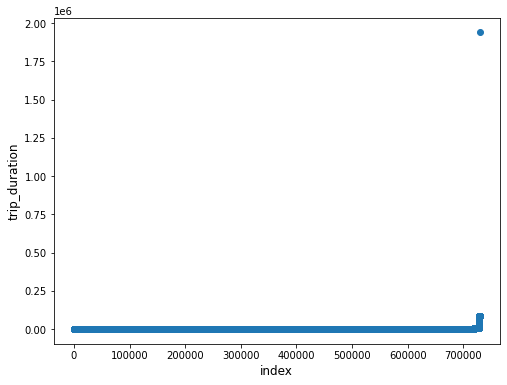

In [32]:
# Plot the target variable
plt.figure(figsize=(8,6))
plt.scatter(range(df.shape[0]), np.sort(df['trip_duration'].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('trip_duration', fontsize=12);

In [33]:
df.describe()

,passenger_count,trip_duration,day_of_month,hour,distance,store_and_fwd_flag_N,store_and_fwd_flag_Y,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,hour_slot_Late Night,hour_slot_Early Morning,hour_slot_Morning,hour_slot_Noon,hour_slot_Eve,hour_slot_Night,vendor_id_1,vendor_id_2
count,729322.000000,7.293220e+05,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000
mean,1.662055,9.522291e+02,15.502088,13.611698,2.564616,0.994461,0.005539,0.153216,0.128848,0.151171,0.133935,0.149926,0.138833,0.144071,0.107195,0.117358,0.187044,0.192760,0.234662,0.160981,0.464597,0.535403
std,1.312446,3.864626e+03,8.699772,6.402853,1.605513,0.074221,0.074221,0.360196,0.335032,0.358215,0.340583,0.356999,0.345772,0.351162,0.309362,0.321847,0.389947,0.394466,0.423788,0.367514,0.498745,0.498745
min,0.000000,1.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.970000e+02,8.000000,9.000000,1.232695,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,6.630000e+02,15.000000,14.000000,2.095672,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,1.075000e+03,23.000000,19.000000,3.876481,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.000000,1.939736e+06,31.000000,23.000000,5.198374,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### There is an extreme value -  lets drop it 
#### and minimum value 1 also

In [34]:
df.shape

(729322, 23)

In [35]:
# Check how many have max value
df[df['trip_duration'] == df['trip_duration'].max()].shape[0]

1

In [36]:
# Check how many have min value - 1 second
df[df['trip_duration'] == df['trip_duration'].min()].shape[0]

13

In [37]:
# Check how many trips are there with less than 1 minute of trip duration
df[df['trip_duration'] <= 60].shape[0]

4362

In [38]:
# There are lot of high values , count the number of rows with trip more than 10 hours
df[df['trip_duration'] >= 10*60*60].shape[0]

978

In [39]:
# Number of trips less than 2 minutes
df[df['trip_duration'] <= 2*60 ].shape[0]

14129

In [40]:
# Lets drop  the max and less than 1 minute rides - potentially wrong entries
orig_rows = df.shape[0]
df = df[df['trip_duration'] != df['trip_duration'].max()]
df = df[df['trip_duration'] > 60]
df.shape

(724959, 23)

In [41]:
# How many rows got droppd
orig_rows - df.shape[0]

4363

In [42]:
df.describe()

,passenger_count,trip_duration,day_of_month,hour,distance,store_and_fwd_flag_N,store_and_fwd_flag_Y,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,hour_slot_Late Night,hour_slot_Early Morning,hour_slot_Morning,hour_slot_Noon,hour_slot_Eve,hour_slot_Night,vendor_id_1,vendor_id_2
count,724959.000000,724959.000000,724959.000000,724959.000000,724959.000000,724959.000000,724959.000000,724959.000000,724959.000000,724959.000000,724959.000000,724959.000000,724959.000000,724959.000000,724959.000000,724959.000000,724959.000000,724959.000000,724959.000000,724959.000000,724959.000000,724959.000000
mean,1.663391,955.115289,15.502470,13.617596,2.579288,0.994531,0.005469,0.153238,0.128843,0.151204,0.133785,0.149916,0.138875,0.144138,0.106868,0.117249,0.187229,0.192692,0.234886,0.161075,0.463913,0.536087
std,1.313424,3136.097209,8.700129,6.400017,1.599014,0.073752,0.073752,0.360217,0.335026,0.358248,0.340422,0.356989,0.345817,0.351230,0.308946,0.321717,0.390095,0.394414,0.423928,0.367601,0.498696,0.498696
min,0.000000,61.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,401.000000,8.000000,9.000000,1.245758,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,667.000000,15.000000,14.000000,2.109072,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,1079.000000,23.000000,19.000000,3.894423,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.000000,86391.000000,31.000000,23.000000,5.198374,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'trip_duration')

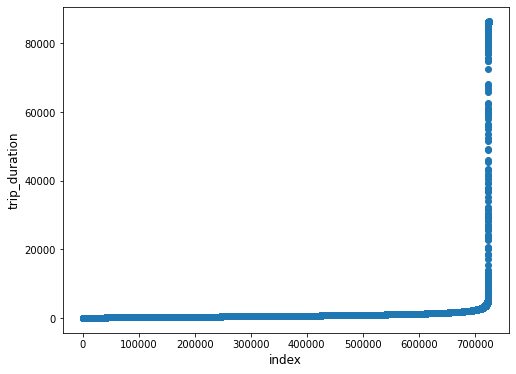

In [43]:
# Lets plot the target again 
plt.figure(figsize=(8,6))
plt.scatter(range(df.shape[0]), np.sort(df['trip_duration'].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('trip_duration', fontsize=12)

### There are many extreme values - both low and high which does not seems correct data 
### Will  leave it at this now, but this is a concern for linear models

In [44]:
df.head()

,id,passenger_count,trip_duration,day_of_month,hour,distance,store_and_fwd_flag_N,store_and_fwd_flag_Y,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,hour_slot_Late Night,hour_slot_Early Morning,hour_slot_Morning,hour_slot_Noon,hour_slot_Eve,hour_slot_Night,vendor_id_1,vendor_id_2
0,id1080784,1,400,29,16,1.199073,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,id0889885,2,1100,11,23,4.129111,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,id0857912,2,1635,21,17,5.198374,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
3,id3744273,6,1141,5,9,2.361097,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4,id0232939,1,848,17,6,4.328534,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [45]:
# write as csv for modelling
# df.to_csv('data/nyc_taxi_trip_duration_processed.csv', index=False)

In [46]:
# Number of trips > 7000
df[df['trip_duration'] >= 5000 ].shape[0]

1827

In [47]:
dt = df[df['trip_duration'] <= 5000]
dt.shape

(723132, 23)

Text(0, 0.5, 'trip_duration')

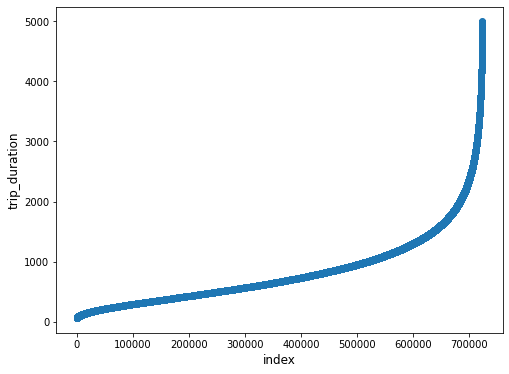

In [48]:
# Lets plot the target again 
plt.figure(figsize=(8,6))
plt.scatter(range(dt.shape[0]), np.sort(dt['trip_duration'].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('trip_duration', fontsize=12)